In [1]:
!nvidia-smi

Wed Apr 26 17:53:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.4/530.4 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 25.1 MB/s eta 0:00:00


In [3]:
import cv2
import pandas as pd
import numpy as np
from IPython.display import display, Image
from ultralytics import YOLO

In [4]:
!yolo task=segment mode=predict model=yolov8n-seg.pt conf=0.5 source='tennis.jpg'

Ultralytics YOLOv8.0.88 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

image 1/1 /content/tennis.jpg: 448x640 1 person, 1 sports ball, 1 tennis racket, 134.5ms
Speed: 0.6ms preprocess, 134.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


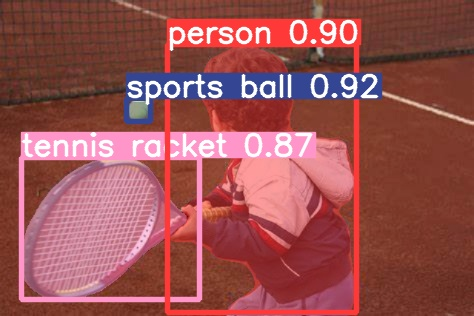

In [5]:
Image(filename="/content/runs/segment/predict/tennis.jpg", height=300)

In [4]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=784a10da15d051e0035319cfbd85d6d375d07e0b50223aaa7cbcb293bd1b0100
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="nCgIfzJtqqMIm1RFtPS2")
project = rf.workspace("tennis-ai").project("football-boxes")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.88, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to football-boxes-1 in yolov8:: 100%|██████████| 1334/1334 [00:00<00:00, 2599.97it/s]


In [6]:
!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

100% 6.73M/6.73M [00:00<00:00, 15.6MB/s]
Ultralytics YOLOv8.0.88 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/football-boxes-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

In [15]:
!ls /content/runs/segment/train/ 

args.yaml					    MaskR_curve.png
BoxF1_curve.png					    results.csv
BoxP_curve.png					    results.png
BoxPR_curve.png					    train_batch0.jpg
BoxR_curve.png					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1682531814.33bb90252f94.1549.0  val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
MaskF1_curve.png				    val_batch1_pred.jpg
MaskP_curve.png					    weights
MaskPR_curve.png


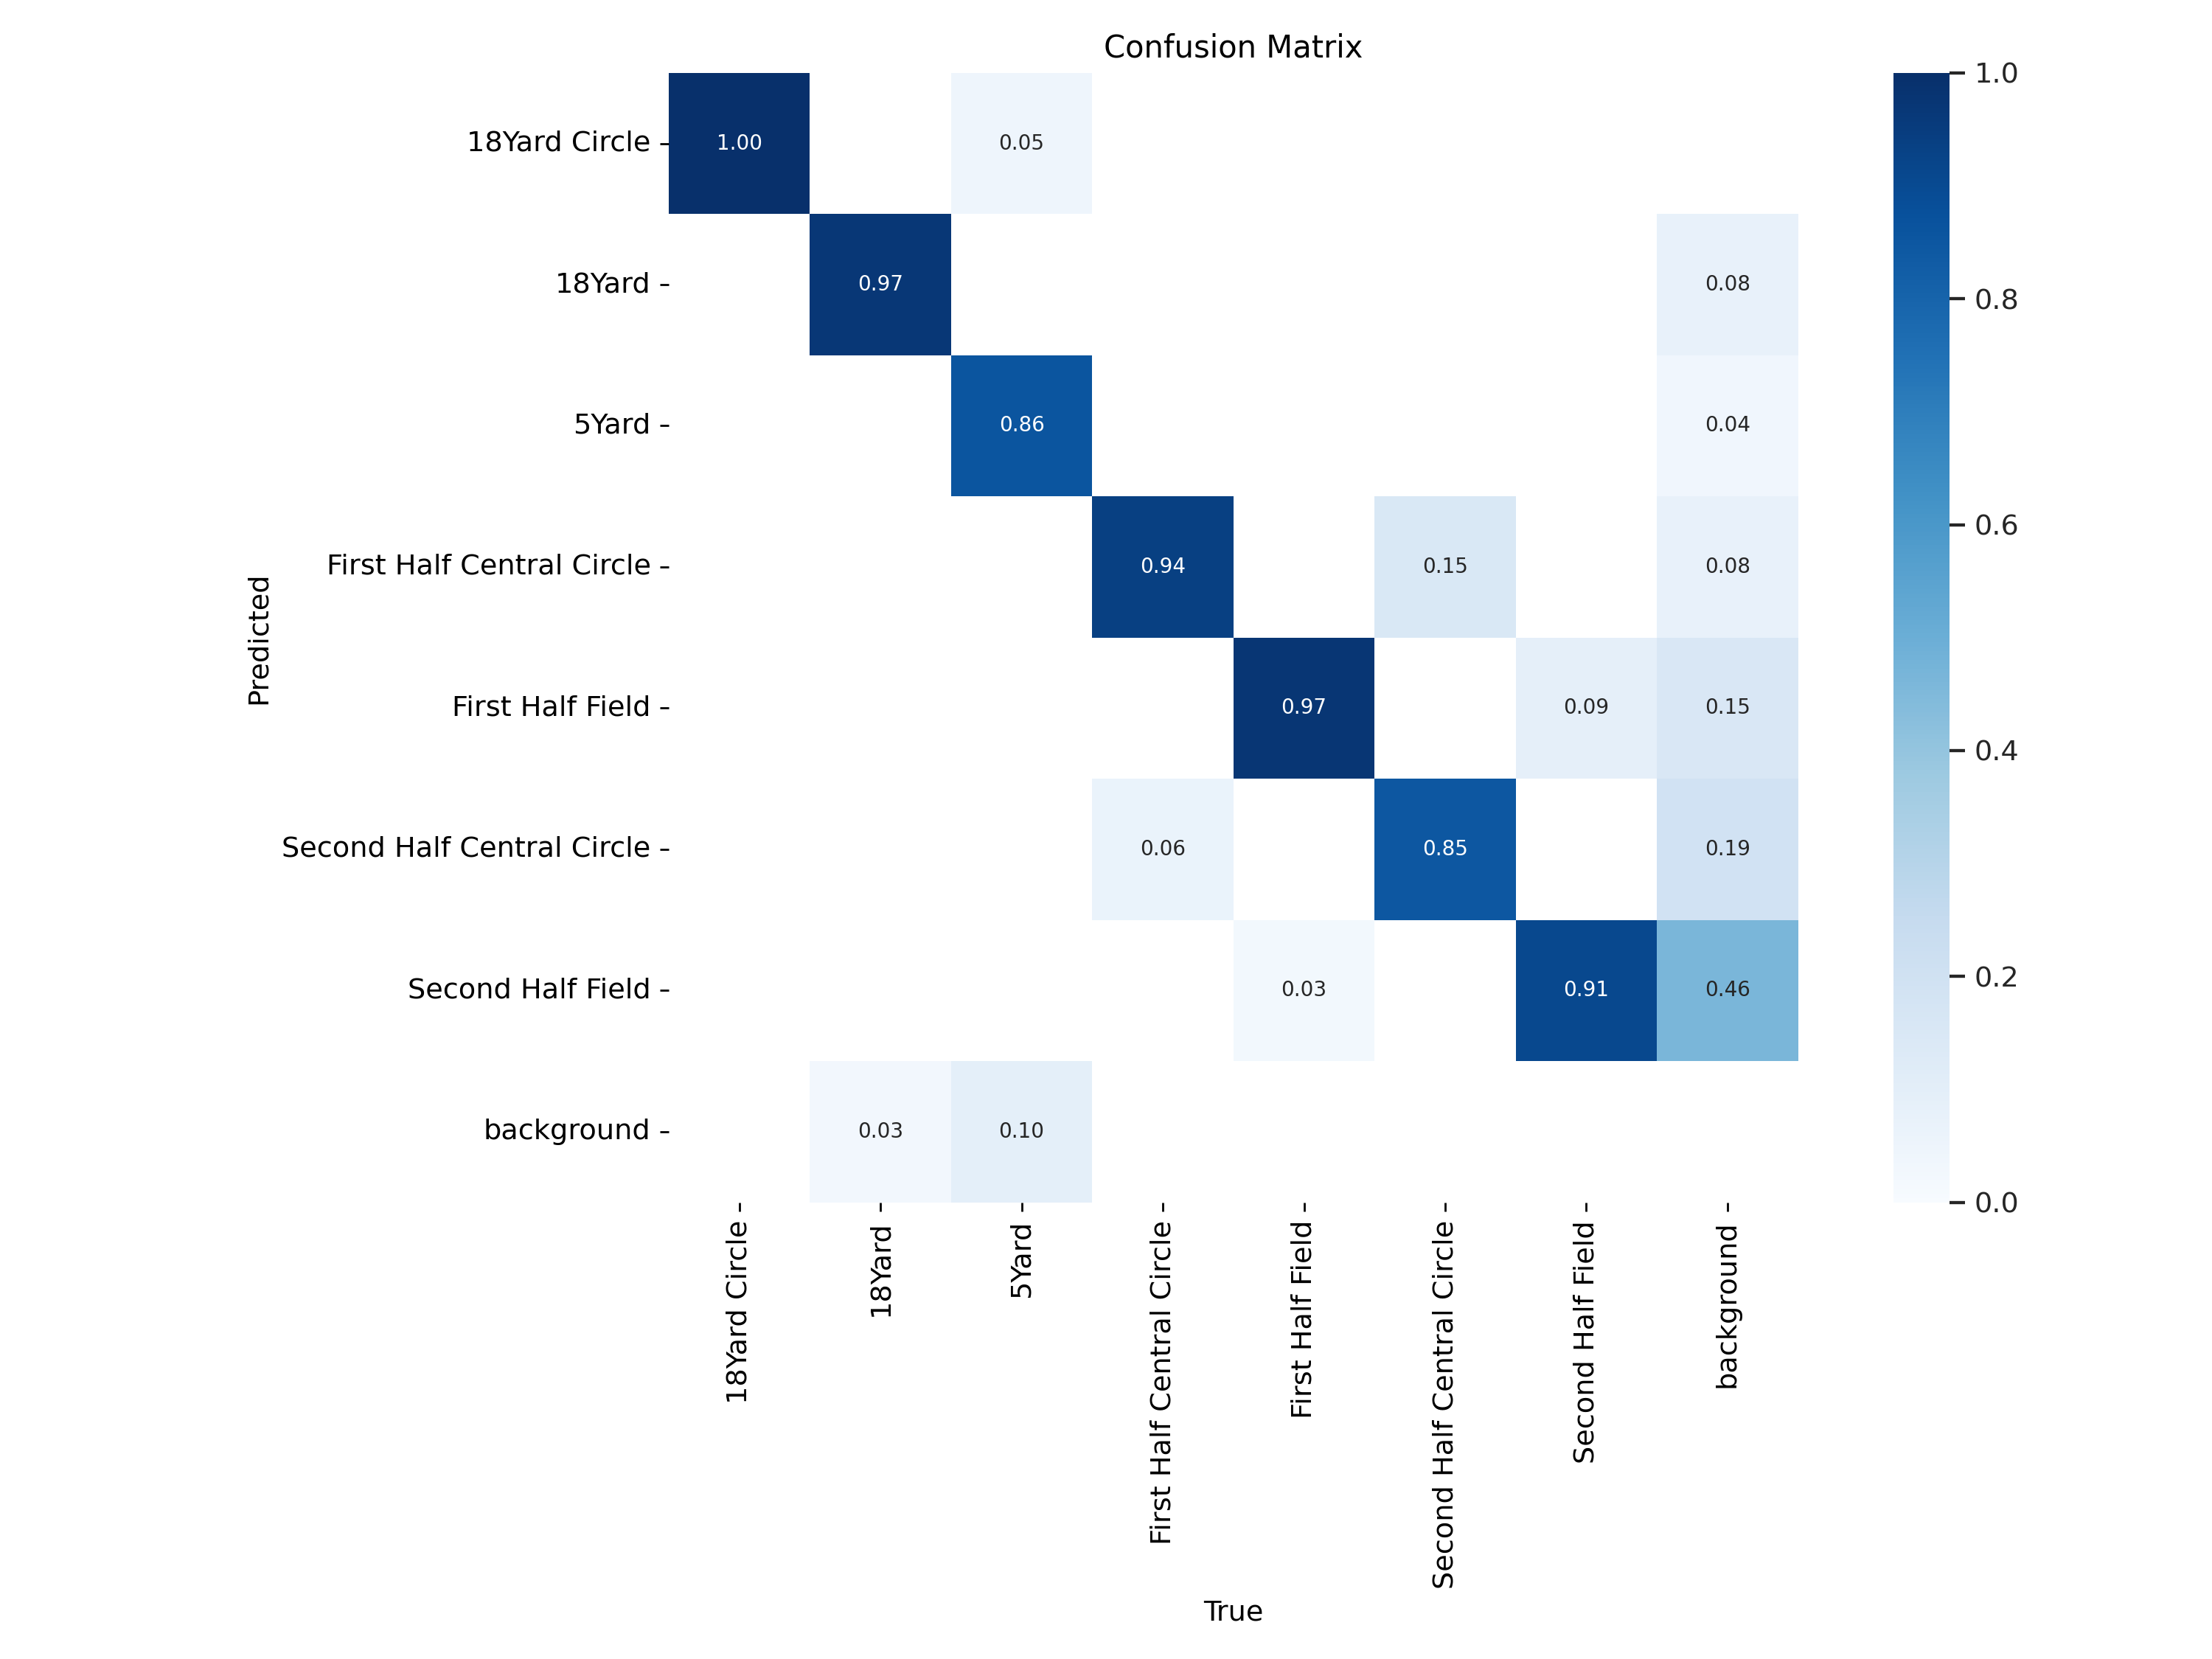

In [14]:
Image(filename="/content/runs/segment/train/confusion_matrix.png", height=400)

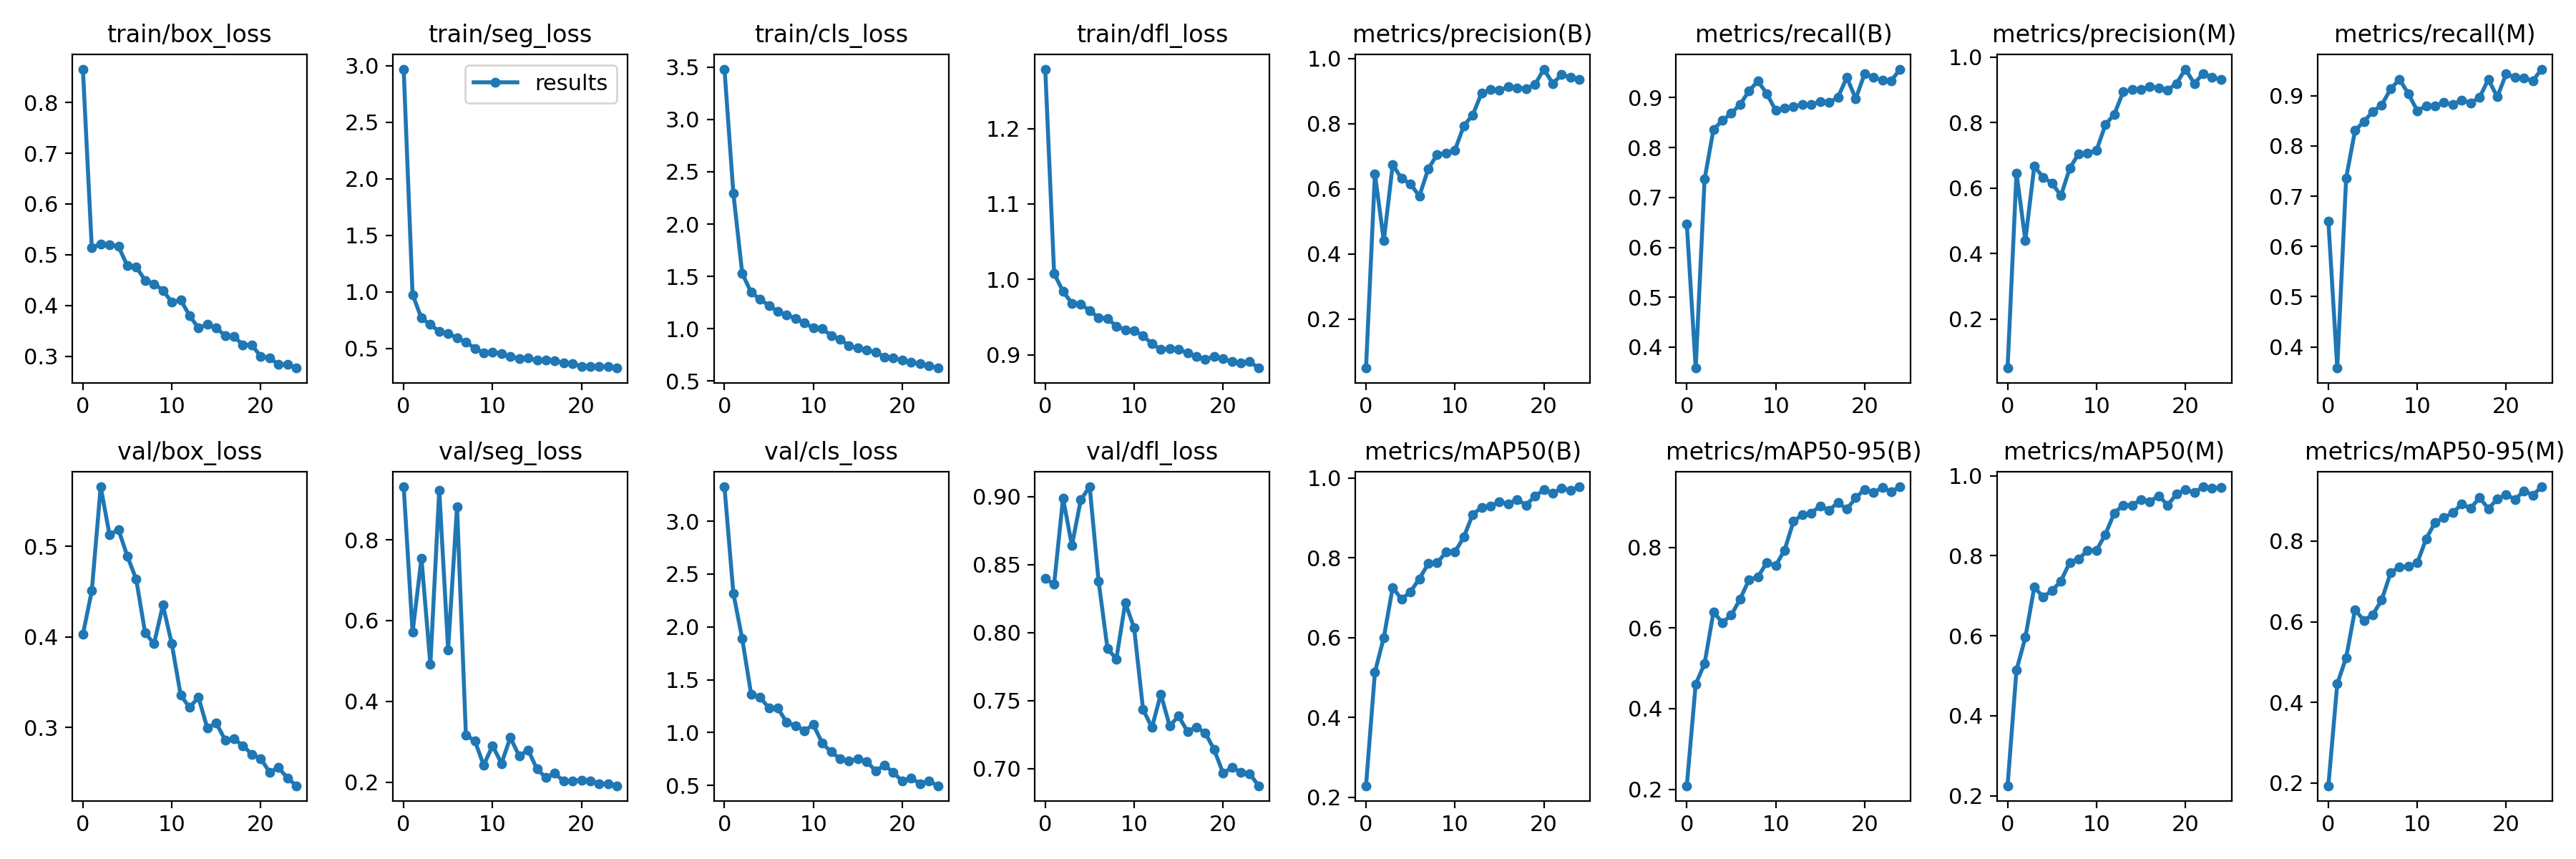

In [16]:
Image(filename="/content/runs/segment/train/results.png", height=400)

In [20]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.88 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs

image 1/31 /content/football-boxes-1/test/images/ArsTot_mp4-18_jpg.rf.55e360bbbec9190a2504726f91cec0f8.jpg: 640x640 1 18Yard Circle, 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 11.5ms
image 2/31 /content/football-boxes-1/test/images/ArsTot_mp4-21_jpg.rf.403a2af1eecf8d524888ee791b87d3c8.jpg: 640x640 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 9.6ms
image 3/31 /content/football-boxes-1/test/images/ArsTot_mp4-25_jpg.rf.cd8c474be94344acef17a71a33e37963.jpg: 640x640 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 10.1ms
image 4/31 /content/football-boxes-1/test/images/ArsTot_mp4-8_jpg.rf.9db7e5390ad83907d8a9068606d418a6.jpg: 640x640 1 18Yard Circle, 

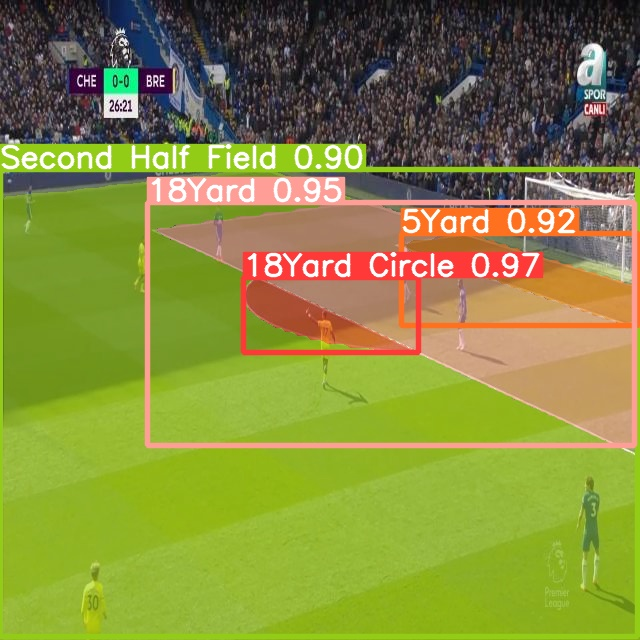

In [21]:
Image(filename="/content/runs/segment/predict2/CheBre_mp4-29_jpg.rf.6c36b395dd5e8dfbdaf7fce1fd69bd7b.jpg", height=400)

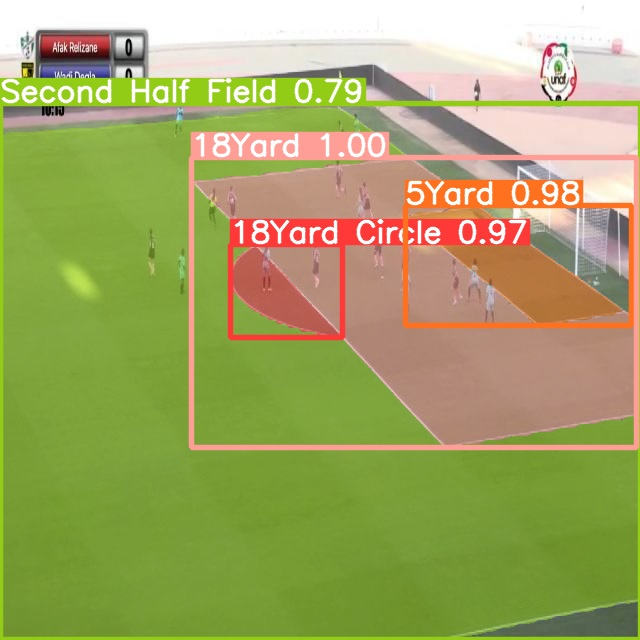

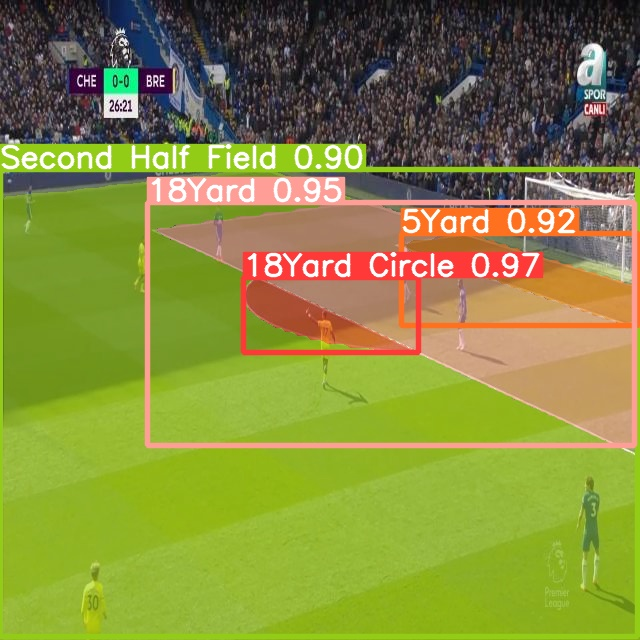

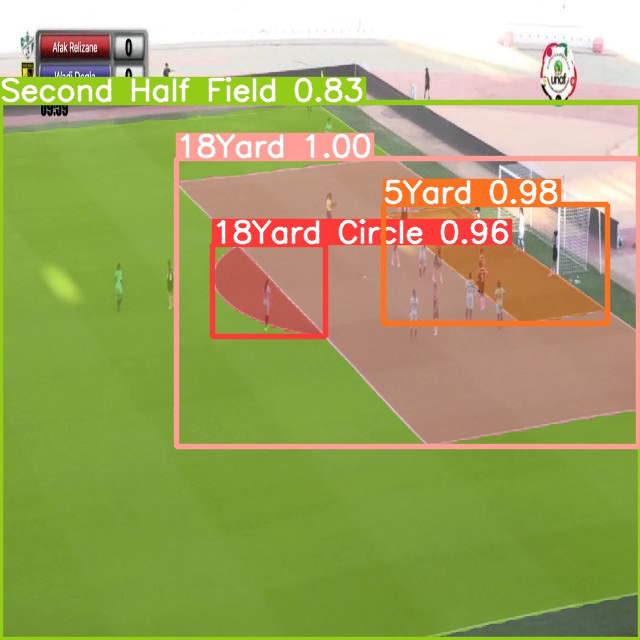

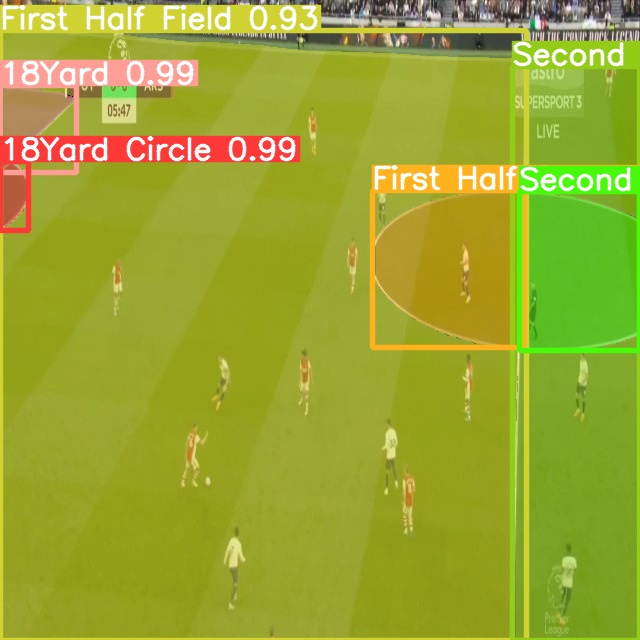

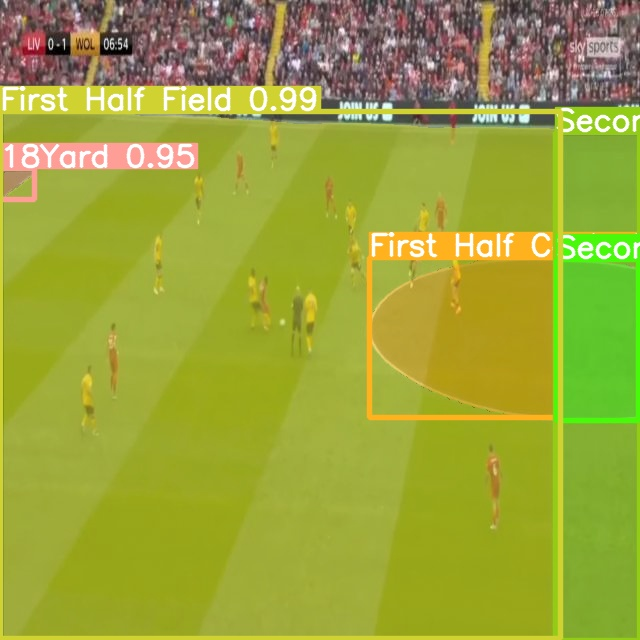

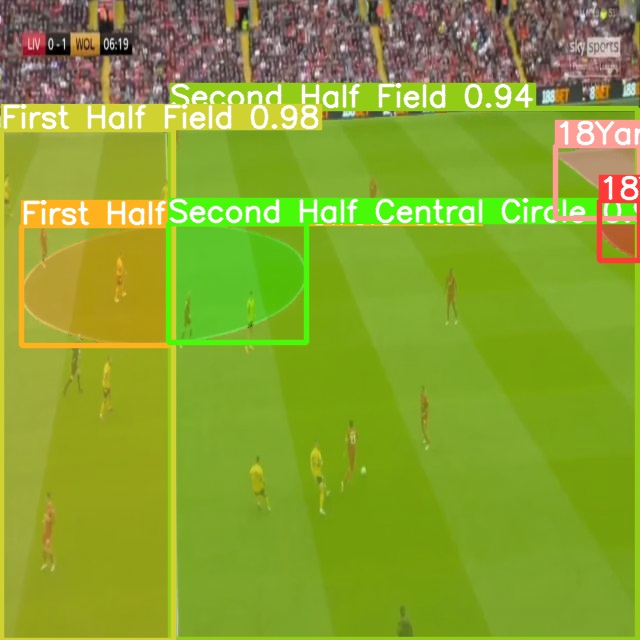

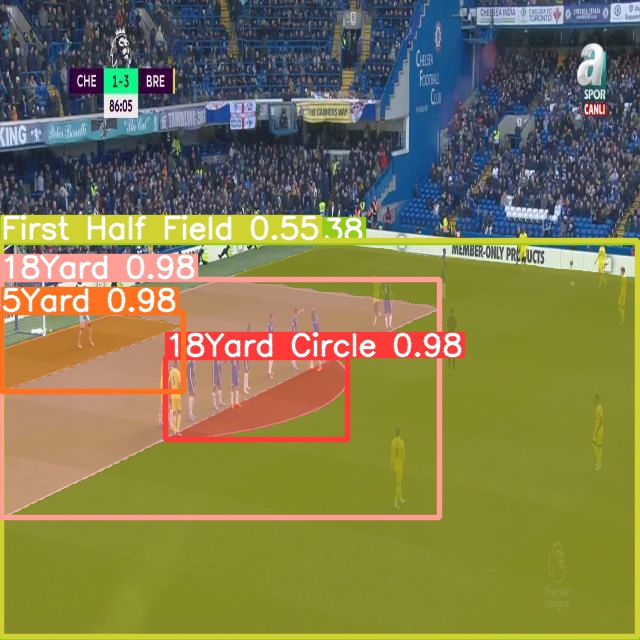

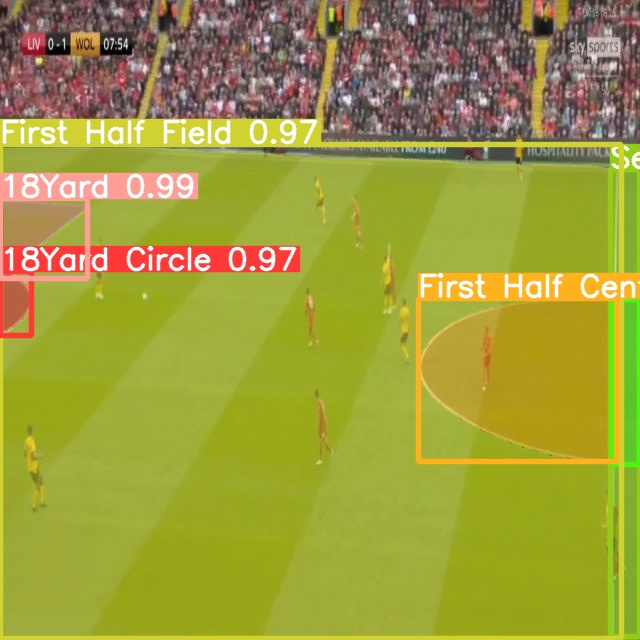

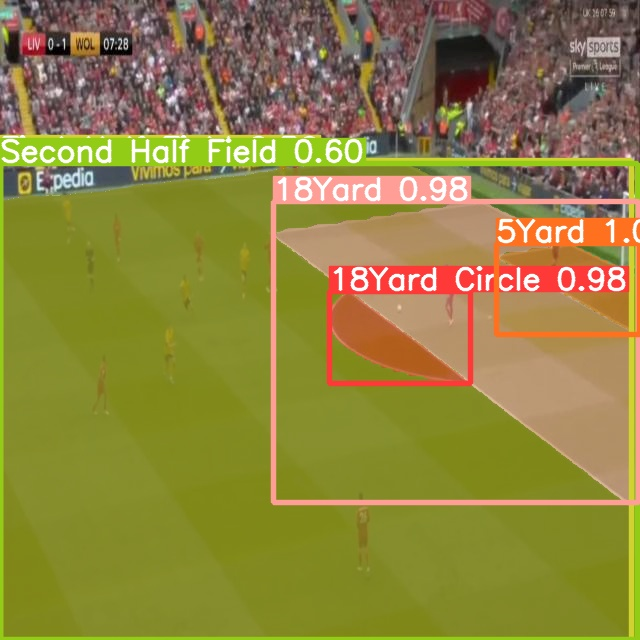

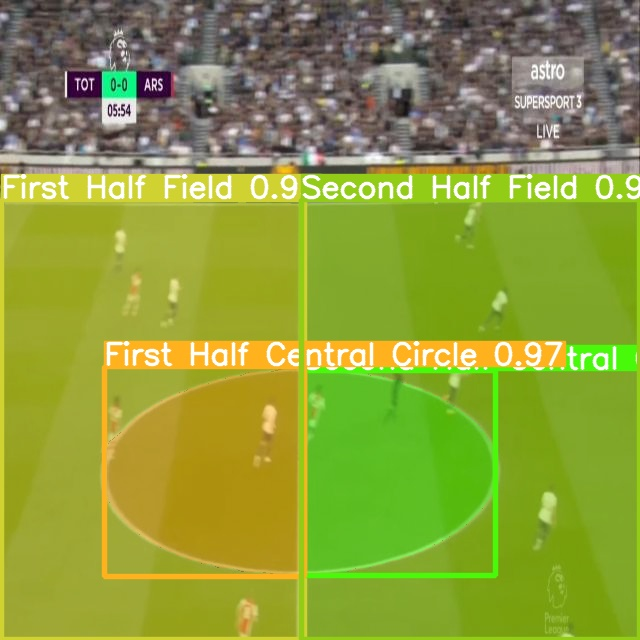

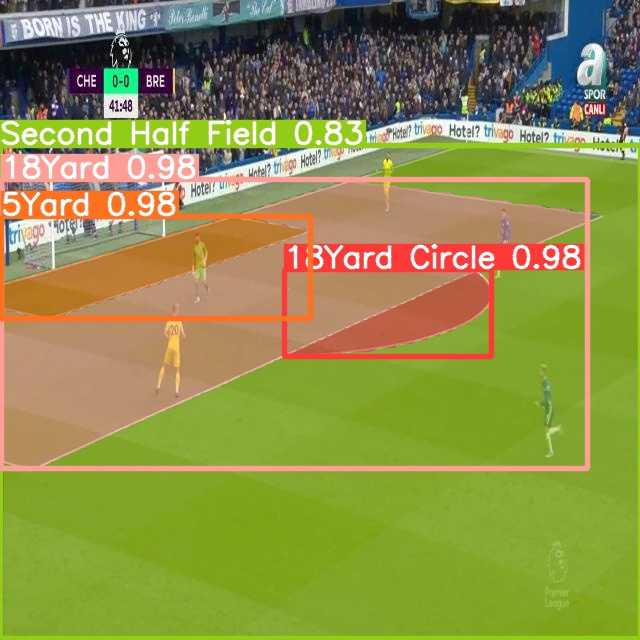

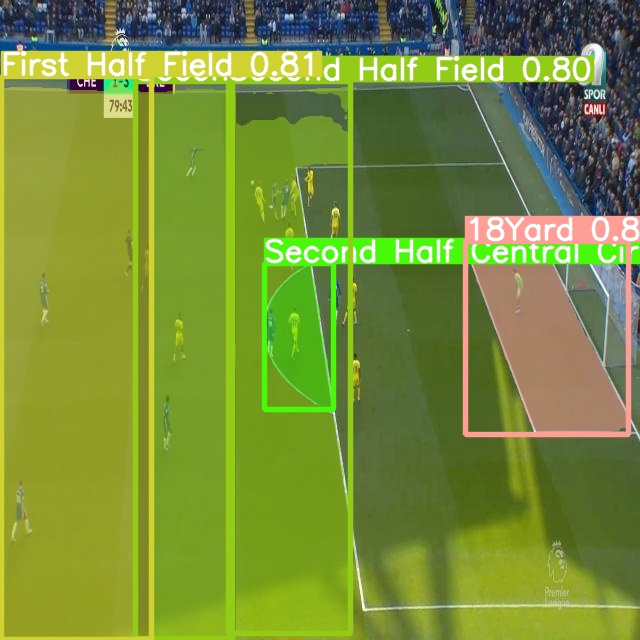

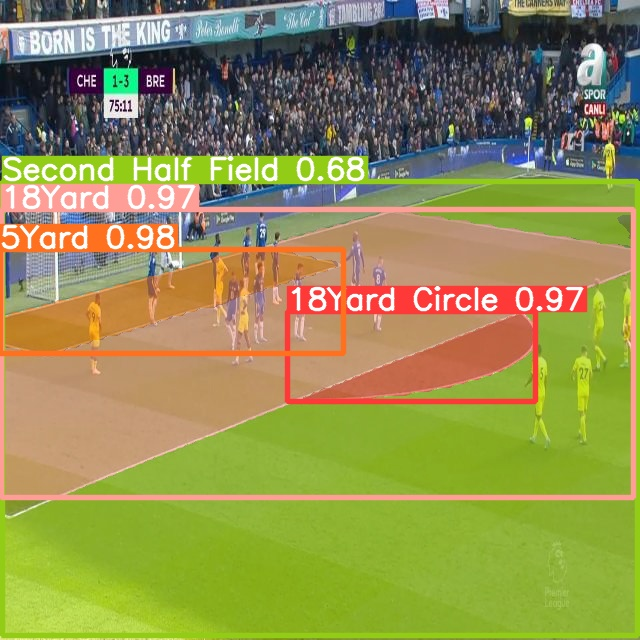

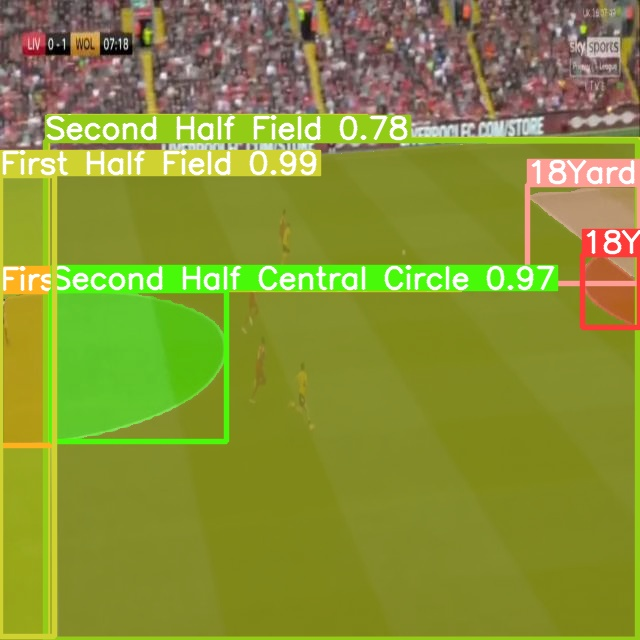

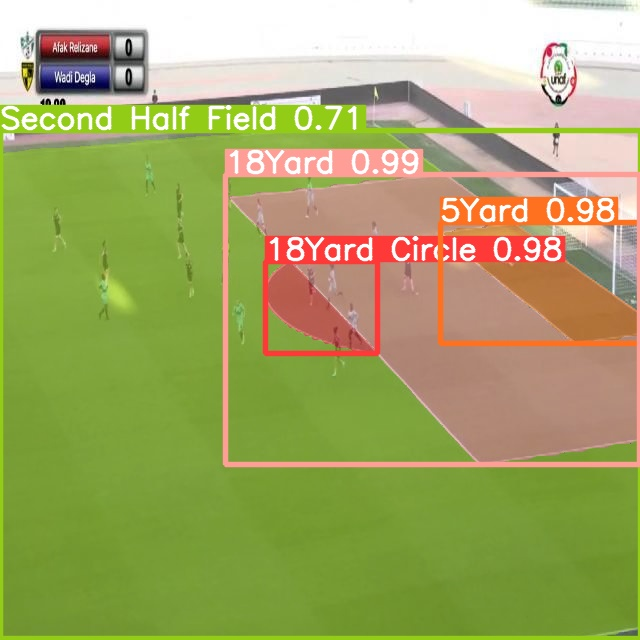

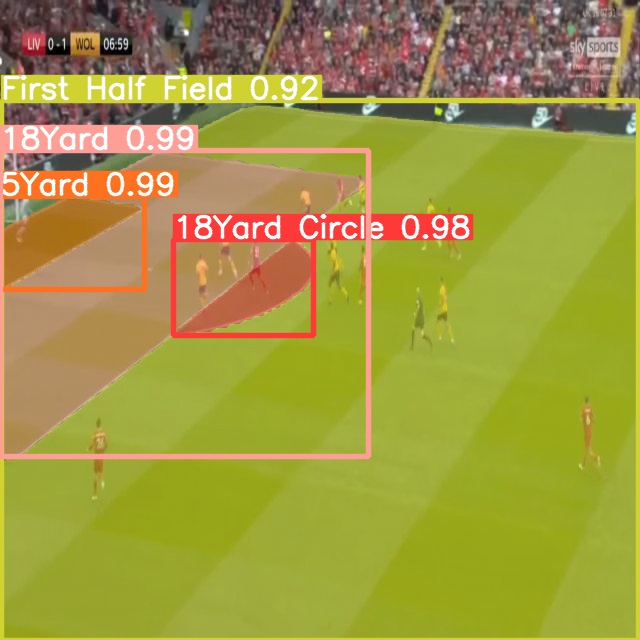

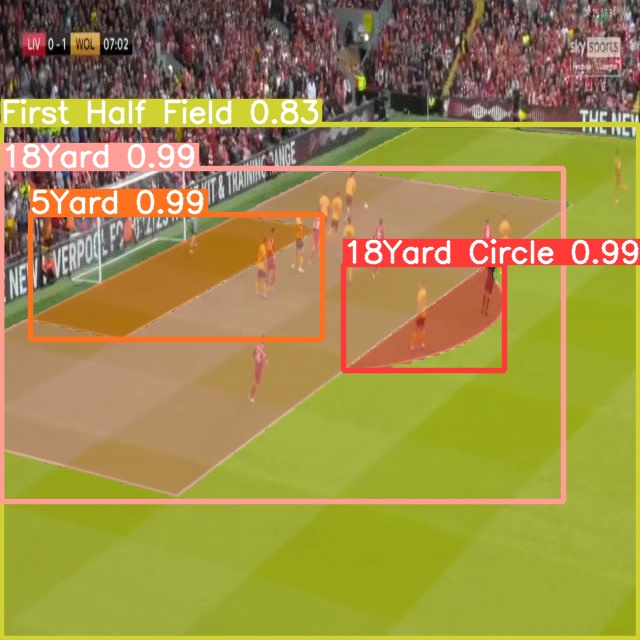

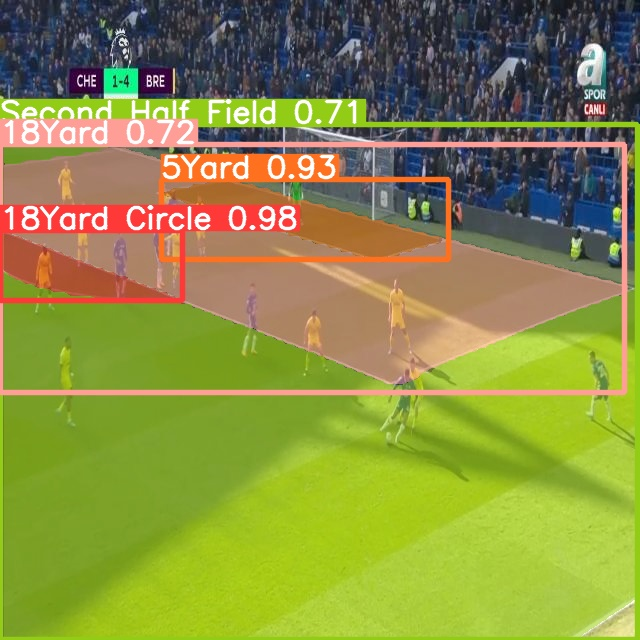

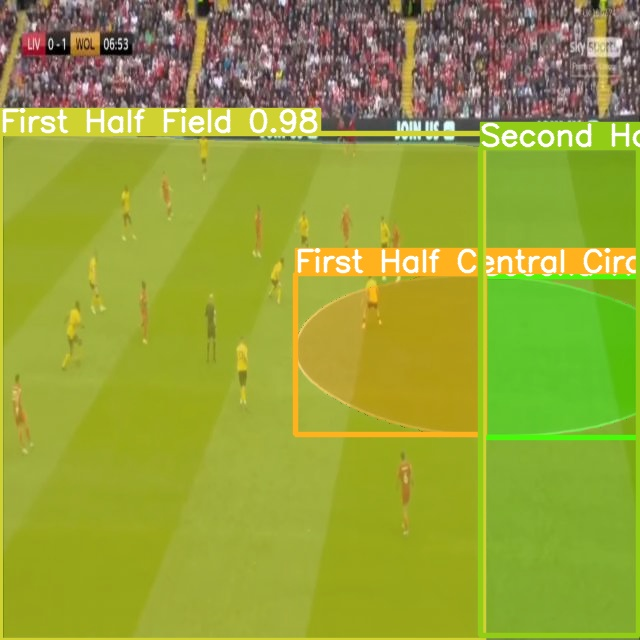

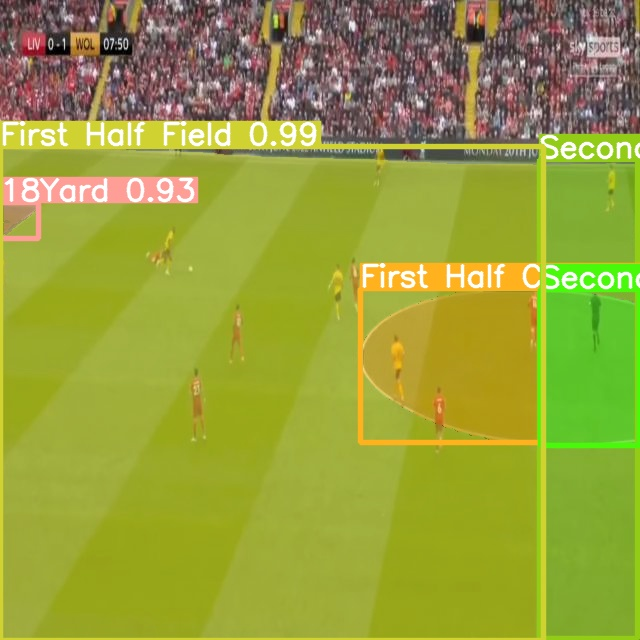

In [23]:
import glob 
for image_path in glob.glob(f"/content/runs/segment/predict2/*jpg")[:20]:
  display(Image(filename=image_path, height=400))
  print("\n")